*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will create a book recommendation algorithm using **K-Nearest Neighbors**.

You will use the [Book-Crossings dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users. 

After importing and cleaning the data, use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

This code:

`get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")`

should return:

```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301], 
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed in to the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed in to the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
#!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

#!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
# add your code here - consider creating a new cell for each section of code
df_books.head(5)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [5]:
df_ratings.head(5)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


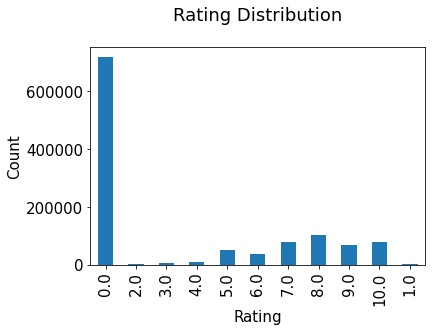

In [6]:
plt.rc("font", size=15)
df_ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()


In [7]:
user_filename = 'BX-Users.csv'
df_users = pd.read_csv(user_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0
    )

In [8]:
print(df_users.shape)
print(list(df_users.columns))
df_users.head(5)

(278858, 3)
['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
rating_count = pd.DataFrame(df_ratings.groupby('isbn')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
isbn,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [10]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['isbn'])
most_rated_books_summary = pd.merge(most_rated_books, df_books, on='isbn')
most_rated_books_summary

,isbn,title,author
0,0971880107,Wild Animus,Rich Shapero
1,0316666343,The Lovely Bones: A Novel,Alice Sebold
2,0385504209,The Da Vinci Code,Dan Brown
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant


In [11]:
average_rating = pd.DataFrame(df_ratings.groupby('isbn')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df_ratings.groupby('isbn')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
isbn,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [12]:
combine_book_rating = pd.merge(df_ratings, df_books, on='isbn')
combine_book_rating.head()

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose


In [13]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['title'])

book_ratingCount = (combine_book_rating.groupby(by = ['title'])['rating'].count().reset_index().
     rename(columns = {'rating': 'totalratingCount'})
     [['title', 'totalratingCount']]
    )
book_ratingCount.head()


,title,totalratingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [14]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,user,isbn,rating,title,author,totalratingCount
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,60
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,60
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,60
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,60
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,60


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalratingCount'].describe())

count   241090.000
mean         4.277
std         16.738
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalratingCount, dtype: float64


In [16]:
print(book_ratingCount['totalratingCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalratingCount, dtype: float64


In [18]:
#Set accordingly as per need
popularity_threshold = 9.0
rating_popular_book = rating_with_totalRatingCount.query('totalratingCount >= @popularity_threshold')
rating_popular_book.head()

,user,isbn,rating,title,author,totalratingCount
0,276725,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,60
1,2313,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,60
2,6543,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,60
3,8680,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,60
4,10314,034545104X,9.000,Flesh Tones: A Novel,M. J. Rose,60


In [19]:
combined = rating_popular_book.merge(df_users, left_on = 'user', right_on = 'User-ID', how = 'left')
#Reducing the size of the dataset
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,user,isbn,rating,title,author,totalratingCount,User-ID,Location
0,276725,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,60,276725,"tyler, texas, usa"
1,2313,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,60,2313,"cincinnati, ohio, usa"
2,6543,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,60,6543,"strafford, missouri, usa"
3,8680,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,60,8680,"st. charles county, missouri, usa"
4,10314,034545104X,9.000,Flesh Tones: A Novel,M. J. Rose,60,10314,"beaverton, oregon, usa"


In [20]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['user', 'title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'title', columns = 'user', values = 'rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [21]:
#Generalized one ( Not for user given data)
def find_query_index():
  for i in range(us_canada_user_rating_pivot.shape[0]):
    if "Where the Heart Is (Oprah's Book Club (Paperback))" in us_canada_user_rating_pivot.index[i]:
      print(i)
      return(i)

query_index = find_query_index()
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

18449
Recommendations for Where the Heart Is (Oprah's Book Club (Paperback)):

1: The Sunday Wife: A Novel, with distance of 0.8995596170425415:
2: Frozen Summer, with distance of 0.9020170569419861:
3: Thrill!, with distance of 0.9044653177261353:
4: Forever Yours, Faithfully: My Love Story, with distance of 0.904478907585144:
5: Fortunes Rocks, with distance of 0.9080843329429626:


In [35]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  def find_query_index(book):
    for i in range(us_canada_user_rating_pivot.shape[0]):
      if book in us_canada_user_rating_pivot.index[i]:
        return(i)

  query_index = find_query_index(book)
  distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)
  recommended_books = []
  for i in range(0, len(distances.flatten())):
      if i == 0:
          print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
          recommended_books.append(us_canada_user_rating_pivot.index[query_index])
          #pass
      else:
          #print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
          recommended_books.append((us_canada_user_rating_pivot.index[indices.flatten()[i]],float(distances.flatten()[i])))
  return recommended_books
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

Recommendations for Where the Heart Is (Oprah's Book Club (Paperback)):

["Where the Heart Is (Oprah's Book Club (Paperback))", ('The Sunday Wife: A Novel', 0.8995596170425415), ('Frozen Summer', 0.9020170569419861), ('Thrill!', 0.9044653177261353), ('Forever Yours, Faithfully: My Love Story', 0.904478907585144)]


Use the cell below to test your function. The `test_book_recommendation()` function will inform you if you passed the challenge or need to keep trying.

In [37]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["The Sunday Wife: A Novel", 'Frozen Summer', 'Thrill!', 'Forever Yours, Faithfully: My Love Story']
  recommended_books_dist = [0.89, 0.9, 0.9, 0.9]
  for i in range(4): 
    if recommends[i+1][0] not in recommended_books:
      test_pass = False
    if abs(recommends[i+1][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You havn't passed yet. Keep trying!")

test_book_recommendation()

Recommendations for Where the Heart Is (Oprah's Book Club (Paperback)):

["Where the Heart Is (Oprah's Book Club (Paperback))", ('The Sunday Wife: A Novel', 0.8995596170425415), ('Frozen Summer', 0.9020170569419861), ('Thrill!', 0.9044653177261353), ('Forever Yours, Faithfully: My Love Story', 0.904478907585144)]
Recommendations for Where the Heart Is (Oprah's Book Club (Paperback)):

You passed the challenge! 🎉🎉🎉🎉🎉
